### Import things

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tag import pos_tag
from nltk.tokenize import WordPunctTokenizer

In [2]:
df = pd.read_csv('./CSVs/all_clean.csv')

#dropping short stories
df['word_count'] = df['text'].map(lambda x: len(x.split(' ')))
df = df[df['word_count'] > 45000].reset_index(drop=True)

In [3]:
df = df.sort_values(by='year')

### Feature engineering

In [4]:
tok = WordPunctTokenizer()

In [5]:
#count total number of adjectives (not unique)
adjectives_list = []

for i in range(len(df)):
    d = {}
    adj_counter = 0
    tagged_words = pos_tag(tok.tokenize(df.loc[i]['text']))
    for j in range(len(tagged_words)):
        if tagged_words[j][1] in ['JJ', 'JJR', 'JJS']:
            adj_counter += 1
    d['title']  = df.loc[i]['title']
    d['adj_count'] = adj_counter
    adjectives_list.append(d)
    
adj_df = pd.DataFrame(adjectives_list)
new_df = pd.merge(df, adj_df)

In [6]:
#count total number of nouns (not unique)
nouns_list = []

for i in range(len(df)):
    d = {}
    noun_counter = 0
    tagged_words = pos_tag(tok.tokenize(df.loc[i]['text']))
    for j in range(len(tagged_words)):
        if tagged_words[j][1] in ['NN', 'NNS', 'NNP', 'NNPS']:
            noun_counter += 1
    d['title']  = df.loc[i]['title']
    d['noun_count'] = noun_counter
    nouns_list.append(d)
    
noun_df = pd.DataFrame(nouns_list)
new_df = pd.merge(new_df, noun_df)

### See if there is a correlation between total adjectives and year  or total nouns and year

<AxesSubplot:>

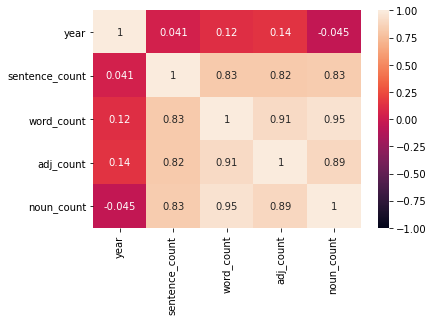

In [7]:
sns.heatmap(new_df.corr(), vmin=-1, vmax=1, annot=True)

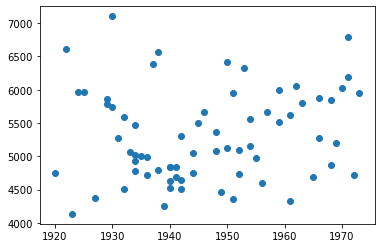

In [8]:
plt.scatter(new_df['year'], new_df['adj_count'])

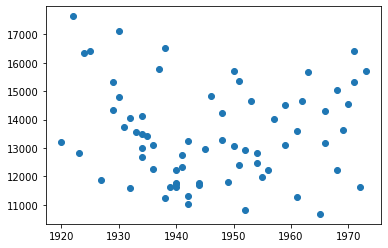

In [9]:
plt.scatter(new_df['year'], new_df['noun_count'])

### More feature engineering

In [10]:
#making a column with a list of all the adjectives in the text
adj_word_list = []
for i in range(len(df)):
    d = {}
    adj_words = ''    
    tagged_words = pos_tag(tok.tokenize(df.loc[i]['text']))
    for j in range(len(tagged_words)):
        if tagged_words[j][1] in ['JJ', 'JJR', 'JJS']:
            adj_words = adj_words + tagged_words[j][0] + ' '
    d['title']  = df.loc[i]['title']
    d['adj_word_list'] = adj_words
    adj_word_list.append(d)

adj_words_df = pd.DataFrame(adj_word_list)
new_df = pd.merge(new_df, adj_words_df)

In [11]:
#making a column with a list of all the nouns in the text
nouns_word_list = []
for i in range(len(df)):
    d = {}
    noun_words = ''    
    tagged_words = pos_tag(tok.tokenize(df.loc[i]['text']))
    for j in range(len(tagged_words)):
        if tagged_words[j][1] in ['NN', 'NNS', 'NNP', 'NNPS']:
            noun_words = noun_words + tagged_words[j][0] + ' '
    d['title']  = df.loc[i]['title']
    d['noun_word_list'] = noun_words
    nouns_word_list.append(d)

noun_word_df = pd.DataFrame(nouns_word_list)
new_df = pd.merge(new_df, noun_word_df)

In [12]:
new_df.head()

,title,text,year,sentence_count,word_count,adj_count,noun_count,adj_word_list,noun_word_list
0,the mysterious affair at styles,the mysterious affair at stylesan introduction...,1920,4967,59534,4748,13218,mysterious stylesan mysterious first good dete...,affair introductionby john autobiography end l...
1,the secret adversary,tommy and tuppence an introductionby john curr...,1922,7372,76791,6608,17640,old old beanthis secret christie detective lig...,tommy tuppence introductionby john currantommy...
2,the murder on the links,onea fellow travelleri believe that a wellknow...,1923,4676,56782,4136,12829,fellow wellknown young forcible original enoug...,travelleri anecdote effect writer commencement...
3,the man in the brown suit,prologuenadina the russian dancer who had take...,1924,6116,72387,5964,16358,russian narrow black long upwards enthusiastic...,dancer paris storm sound applause eyes line sc...
4,the secret of chimneys,oneanthony cade signs ongentleman joewhy if it...,1925,6739,70811,5961,16417,old considerable old much tall lean suntanned ...,oneanthony cade signs joewhy jimmy mcgrathcast...


In [13]:
new_df.to_csv('./novels_features.csv', index=False)